<a href="https://colab.research.google.com/github/qianjing2020/DS-Unit-1-Sprint-2-Statistics/blob/master/JingQian_LS_DS10_122_Sampling_Confidence_Intervals_and_Hypothesis_Testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lambda School Data Science Module 122
## Sampling, Confidence Intervals, and Hypothesis Testing

## Prepare - examine other available hypothesis tests

If you had to pick a single hypothesis test in your toolbox, t-test would probably be the best choice - but the good news is you don't have to pick just one! Here's some of the others to be aware of:

In [56]:
import numpy as np
from scipy.stats import chisquare  # One-way chi square test
from scipy import stats
import matplotlib.pyplot as plt
#Calculate a one-way chi square test.
#The chi square test tests the null hypothesis that the categorical data has the given frequencies.
# http://onlinestatbook.com/2/chi_square/one-way.html
ind_obs = np.array([[6,6,6,6,6,6], [8,5,9,2,7,5]]).T 
## column 1 is outcome, column 2 is expected, or reverse order is also fine
# null hypothesis is  test other deviations between expected and observed frequencies.
print(ind_obs)
print(chisquare(ind_obs, axis=None))
print('The null hypotheis that the outcome meet the expectation cannot be rejected')

dep_obs = np.array([[16, 18, 16, 14, 12, 12], [32, 24, 16, 28, 20, 24]]).T
print(dep_obs)
print(chisquare(dep_obs, axis=None))
print('The null hypothesis that the observed scores deviates significantly from the expected scores can be rejected.')

[[6 8]
 [6 5]
 [6 9]
 [6 2]
 [6 7]
 [6 5]]
Power_divergenceResult(statistic=5.333333333333334, pvalue=0.9139552815097934)
The null hypotheis that the outcome meet the expectation cannot be rejected
[[16 32]
 [18 24]
 [16 16]
 [14 28]
 [12 20]
 [12 24]]
Power_divergenceResult(statistic=23.31034482758621, pvalue=0.015975692534127565)
The null hypothesis that the observed scores deviates significantly from the expected scores can be rejected.


In [0]:
# Chi square can take any crosstab/table and test the independence of rows/cols
# The null hypothesis is that the rows/cols are independent -> low chi square
# The alternative is that there is a dependence -> high chi square
# Be aware! Chi square does *not* tell you direction/causation

NormaltestResult(statistic=44.46326896541671, pvalue=2.212706545037662e-10)
The null hypothesis can be rejected


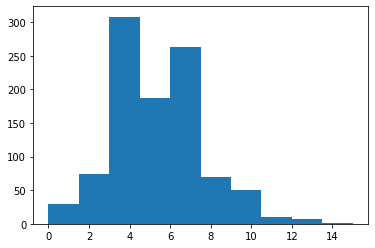

In [10]:
# Distribution tests:
# We often assume that something is normal, but it can be important to *check*
# For example, later on with predictive modeling, a typical assumption is that
# residuals (prediction errors) are normal - checking is a good diagnostic

# Poisson models arrival times and is related to the binomial (coinflip)
# .poisson(lamda, k) : for events with an expected separation lambda, 
# the Poisson distribution f(lambda,k) describes the probability of k events 
# occurring within the observed interval lambda.
x = np.random.poisson(5, 1000) 
plt.hist(x, bins=10)
k2, p = stats.normaltest(x) #This function tests the null hypothesis that a sample comes from a normal distribution.
alpha = 1e-3
if p < alpha:  # null hypothesis: x comes from a normal distribution
  print("The null hypothesis can be rejected")
else:
  print("The null hypothesis cannot be rejected")


In [14]:
#  The Kruskal-Wallis H-test tests the null hypothesis that the population median
#  of all of the groups are equal. It is a non-parametric version of ANOVA. 
#  The test works on 2 or more independent samples, which may have different 
#  sizes. 
# Note that rejecting the null hypothesis does not indicate which of 
#  the groups differs. Post-hoc comparisons between groups are required to 
#  determine which groups are different.
# Can be applied to ranking decisions/outcomes/recommendations
# The underlying math comes from chi-square distribution, and is best for n>5

x = [1, 3, 5, 7, 9]
y = [2, 4, 6, 8, 10]
print(stats.kruskal(x, y))  
# conclusion: cannot reject H0 that x and y's population median are equal

x = [1, 1]
y = [2, 2, 2, 2]
z = [3, 3, 3, 3, 3, 3 ,3]  # Hey, a third group, and of different size!
print(stats.kruskal(x, y, z))  # x clearly dominates
# conclusion: there are difference in x,y,z population median, further test needed

KruskalResult(statistic=0.2727272727272734, pvalue=0.6015081344405895)
KruskalResult(statistic=12.000000000000005, pvalue=0.0024787521766663516)


And there's many more! `scipy.stats` is fairly comprehensive, though there are even more available if you delve into the extended world of statistics packages. As tests get increasingly obscure and specialized, the importance of knowing them by heart becomes small - but being able to look them up and figure them out when they *are* relevant is still important.

## Degrees of Freedom

<https://blog.minitab.com/blog/statistics-and-quality-data-analysis/what-are-degrees-of-freedom-in-statistics>

## T-test Assumptions

In the t-test comparing the means of two independent samples, the following assumptions should be met:

1.   The means of the two populations being compared should follow normal distributions. Under weak assumptions, this follows in large samples from the central limit theorem, even when the distribution of observations in each group is non-normal.
2.   If using Student's original definition of the t-test, the two populations being compared should have the same variance (testable using F-test, Levene's test, Bartlett's test, or the Brown–Forsythe test; or assessable graphically using a Q–Q plot). If the sample sizes in the two groups being compared are equal, Student's original t-test is highly robust to the presence of unequal variances. Welch's t-test is insensitive to equality of the variances regardless of whether the sample sizes are similar.
3.   The data used to carry out the test should be sampled independently from the two populations being compared. This is in general not testable from the data, but if the data are known to be dependently sampled (that is, if they were sampled in clusters), then the classical t-tests discussed here may give misleading results.



In [0]:
from scipy.stats import ttest_ind

?ttest_ind

## Central Limit Theorem



In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [17]:
# Let me flip a coin 12 times
# binomial input: n trials and p probability of success where n an integer >= 0 
# and p is in the interval [0,1], size is the number of the trials
coinflips = np.random.binomial(n=1, p=.5, size=12)
coinflips

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1])

In [18]:
# What is the mean of this sample of coinflips?
coinflips.mean()

0.3333333333333333

In [19]:
coinflips = np.random.binomial(n=1, p=.5, size=12)
coinflips

array([1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0])

In [20]:
coinflips.mean()

0.6666666666666666

In [25]:
# Why are these values different? Shouldn't the mean be at .5 for a fair coin?
print(np.random.binomial(n=1, p=.5, size=10000).mean())
print(np.random.binomial(n=1, p=.5, size=10000).mean())

0.5074
0.5018


## Estimates have their own distribution

No matter the distribution of our raw data, our estimates will always be distributed normally - This is the main outcome of the Central Limit Theorem. 

In order to really see the distribution of our sample mean estimate, we are going to estimate the mean repeatedly and then use all of those different estimates to make a histogram.

In [34]:
sample_means = []
for x in range(0,3000):
  coinflips = np.random.binomial(n=1, p=.5, size=8)
  one_sample = coinflips
  sample_means.append(coinflips.mean())

print(len(sample_means))
print(sample_means)

3000
[0.375, 0.5, 0.125, 0.625, 0.625, 0.5, 0.375, 0.75, 0.625, 0.375, 0.625, 0.5, 0.625, 0.5, 0.5, 0.5, 0.875, 0.375, 0.5, 0.5, 0.5, 0.625, 0.375, 0.375, 0.5, 0.375, 0.625, 0.75, 0.5, 0.5, 0.375, 0.875, 0.625, 0.375, 0.5, 0.75, 0.75, 0.25, 0.5, 0.0, 0.5, 0.625, 0.125, 0.75, 0.5, 0.375, 0.625, 0.5, 0.625, 0.25, 0.25, 0.25, 0.375, 0.375, 0.25, 0.625, 0.25, 0.75, 0.5, 0.5, 0.5, 0.5, 0.25, 0.25, 0.625, 0.375, 0.625, 0.375, 0.625, 0.625, 0.5, 0.25, 0.625, 0.625, 0.125, 0.5, 0.375, 0.5, 0.375, 0.75, 0.5, 0.5, 0.75, 0.5, 0.5, 0.625, 0.5, 0.375, 0.375, 0.5, 0.5, 0.375, 0.5, 0.625, 0.5, 0.25, 0.5, 0.625, 0.625, 0.5, 0.5, 0.75, 0.25, 0.5, 0.625, 0.5, 0.625, 0.75, 0.375, 0.375, 0.375, 0.75, 0.75, 0.625, 0.625, 0.25, 0.625, 0.5, 0.5, 0.625, 0.875, 0.25, 0.125, 0.375, 0.75, 0.625, 0.625, 0.25, 0.5, 0.625, 0.625, 0.625, 0.75, 0.5, 0.75, 0.75, 0.625, 0.5, 0.5, 0.625, 0.625, 0.625, 0.375, 0.5, 0.5, 0.375, 0.125, 0.625, 0.25, 0.125, 0.5, 0.5, 0.375, 0.375, 0.25, 0.625, 0.375, 0.625, 0.5, 0.5, 0.625, 0

In [37]:
df = pd.DataFrame({'single_sample': one_sample})
df.head()

,single_sample
0,0
1,0
2,1
3,0
4,1


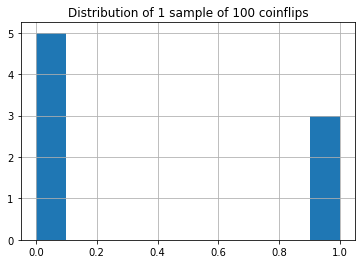

In [38]:
df.single_sample.hist();
plt.title('Distribution of 1 sample of 100 coinflips');

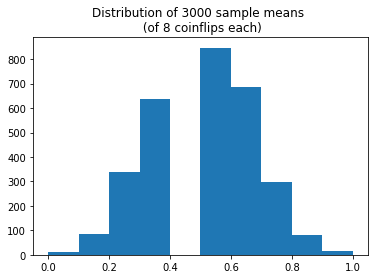

In [40]:
ax = plt.hist(sample_means, bins=10)
plt.title('Distribution of 3000 sample means \n (of 8 coinflips each)');

What does the Central Limit Theorem State? That no matter the initial distribution of the population, the distribution of sample means taken will approximate a normal distribution as $n \rightarrow \infty$.

This has very important implications for hypothesis testing and is precisely the reason why the t-distribution begins to approximate the normal distribution as our sample size increases. 

In [41]:
sample_means_small = []
sample_means_large = []
for x in range(0,3000):
  coinflips_small = np.random.binomial(n=1, p=.5, size=20)
  coinflips_large = np.random.binomial(n=1, p=.5, size=100)
  one_small_sample = coinflips_small
  one_large_sample = coinflips_large
  sample_means_small.append(coinflips_small.mean())
  sample_means_large.append(coinflips_large.mean())

print(len(sample_means_small))
print(sample_means_small)

3000
[0.4, 0.35, 0.45, 0.75, 0.7, 0.55, 0.4, 0.75, 0.55, 0.55, 0.6, 0.6, 0.35, 0.55, 0.3, 0.5, 0.6, 0.6, 0.5, 0.45, 0.6, 0.6, 0.5, 0.4, 0.35, 0.5, 0.55, 0.5, 0.4, 0.45, 0.6, 0.7, 0.3, 0.65, 0.55, 0.55, 0.55, 0.6, 0.65, 0.4, 0.45, 0.5, 0.45, 0.4, 0.65, 0.5, 0.55, 0.5, 0.45, 0.4, 0.6, 0.65, 0.5, 0.55, 0.45, 0.7, 0.6, 0.4, 0.55, 0.45, 0.45, 0.4, 0.5, 0.45, 0.65, 0.55, 0.3, 0.55, 0.5, 0.3, 0.3, 0.65, 0.4, 0.5, 0.5, 0.6, 0.45, 0.75, 0.45, 0.35, 0.65, 0.5, 0.3, 0.6, 0.8, 0.65, 0.4, 0.65, 0.5, 0.65, 0.45, 0.35, 0.6, 0.55, 0.8, 0.45, 0.4, 0.4, 0.35, 0.55, 0.55, 0.7, 0.45, 0.5, 0.6, 0.55, 0.5, 0.5, 0.35, 0.5, 0.4, 0.5, 0.5, 0.4, 0.45, 0.6, 0.4, 0.6, 0.4, 0.45, 0.45, 0.4, 0.55, 0.6, 0.45, 0.5, 0.45, 0.3, 0.35, 0.7, 0.45, 0.6, 0.55, 0.55, 0.5, 0.25, 0.4, 0.4, 0.65, 0.5, 0.5, 0.3, 0.7, 0.55, 0.5, 0.7, 0.55, 0.6, 0.5, 0.55, 0.6, 0.5, 0.45, 0.5, 0.4, 0.45, 0.6, 0.65, 0.5, 0.6, 0.7, 0.6, 0.4, 0.5, 0.6, 0.65, 0.55, 0.5, 0.45, 0.55, 0.35, 0.6, 0.4, 0.45, 0.55, 0.45, 0.45, 0.5, 0.2, 0.4, 0.55, 0.6, 0.45

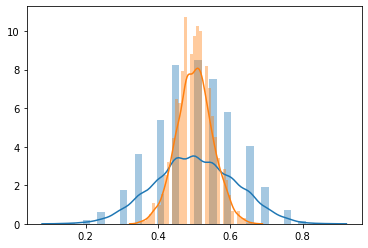

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns
fix, ax = plt.subplots()
for sample in [sample_means_small, sample_means_large]:
  sns.distplot(sample)

## Standard Error of the Mean

What does it mean to "estimate" the Population mean?

### Build and Interpret a Confidence Interval

<img src="https://github.com/ryanallredblog/ryanallredblog.github.io/blob/master/img/Confidence_Interval.png?raw=true" width=300>

In [0]:
def confidence_interval(data, confidence=0.95):
  """
  Calculate the confidence interval of a sample mean.
  Using t-distribution and two-tailed test, default 95% confidence. 
  Arguments:
    data - iterable (list or numpy array) of sample observations
    confidence - level of confidence for the interval
  Returns:
    tuple of (mean, lower bound, upper bound)
  """
  data = np.array(data)
  mean = np.mean(data)
  n = len(data)
  stderr = np.std(data, ddof=1)/np.sqrt(n) 
  # ddof: Delta Degrees of Freedom. The divisor used in calculations is 
  # N - ddof, where N represents the number of elements. By default ddof is zero
  t_stats = stats.t.ppf((1 + confidence) / 2.0, n - 1) #??? more explain on this ppf function
  moe = stderr * t_stats #margin of error
  return (mean - moe, mean, mean + moe)

In [0]:
# 95% confidence level
(1 + .95) / 2.0
1.95 / 2.0
= 97.5

# We want the t-statistic that corresponds to that probability cut off for a 
# given t distribution (a distribution with a certain degrees of freedom)
# stats.t.ppf is just looking up the corresponding t statistic

## Graphically Represent a Confidence Interval

In [49]:
coinflips_100 = np.random.binomial(n=1, p=.5, size=100)
coinflips_100

array([1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1])

In [57]:
confidence_interval(coinflips_100)

(0.46100986648567294, 0.56, 0.6589901335143271)

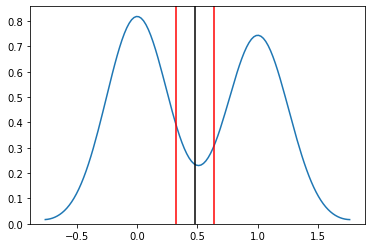

In [59]:
import seaborn as sns

coinflips_42 = np.random.binomial(n=1, p=.5, size=42)
sns.kdeplot(coinflips_42)
CI = confidence_interval(coinflips_42)
plt.axvline(x=CI[0], color='red')
plt.axvline(x=CI[2], color='red')
plt.axvline(x=CI[1], color='k');

### Matplotlib Error Bars can also be userful for visualizing confidence intervals: 

<https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.errorbar.html>

In [0]:
??? errorbar just plots mean and std, how can this visualize confidence intervals?

## Relationship between Confidence Intervals and T-tests

Confidence Interval == Bounds of statistical significance for our t-test

A sample mean that falls inside of our confidence interval will "FAIL TO REJECT" our null hypothesis

A sample mean that falls outside of our confidence interval will "REJECT" our null hypothesis

In [0]:
from scipy.stats import t, ttest_1samp

In [61]:
import numpy as np
coinflip_means = []
for x in range(0,100):
  coinflips = np.random.binomial(n=1, p=.5, size=30)
  coinflip_means.append(coinflips.mean())
print(coinflip_means)

[0.4666666666666667, 0.5666666666666667, 0.43333333333333335, 0.5333333333333333, 0.5, 0.5333333333333333, 0.43333333333333335, 0.4, 0.5666666666666667, 0.5, 0.5333333333333333, 0.43333333333333335, 0.5666666666666667, 0.4666666666666667, 0.6, 0.43333333333333335, 0.6333333333333333, 0.5333333333333333, 0.5333333333333333, 0.6, 0.6666666666666666, 0.5, 0.6, 0.4666666666666667, 0.43333333333333335, 0.36666666666666664, 0.6, 0.5333333333333333, 0.5333333333333333, 0.4, 0.5, 0.5333333333333333, 0.43333333333333335, 0.43333333333333335, 0.4666666666666667, 0.6, 0.5, 0.5333333333333333, 0.5, 0.4, 0.5, 0.6, 0.5, 0.43333333333333335, 0.5, 0.5, 0.6333333333333333, 0.5, 0.5666666666666667, 0.5, 0.5, 0.6666666666666666, 0.4666666666666667, 0.43333333333333335, 0.3333333333333333, 0.5, 0.4, 0.5, 0.6333333333333333, 0.36666666666666664, 0.6333333333333333, 0.5333333333333333, 0.5, 0.43333333333333335, 0.4666666666666667, 0.5, 0.5333333333333333, 0.5333333333333333, 0.4666666666666667, 0.4333333333

In [76]:
'''You can roll your own CI calculation pretty easily. 
The only thing that's a little bit challenging 
is understanding the t stat lookup'''
n = len(coinflip_means) # Sample Size
dof = n-1 # Degrees of Freedom
mean = np.mean(coinflip_means) # The Mean of Means
sample_std = np.std(coinflip_means, ddof=1) # Sample Standard Deviation
std_err = sample_std/n**.5 # Standard Error

CI = stats.t.interval(.95, dof, loc=mean, scale=std_err) 
# t.interval returns confidence interval with equal areas around the location 
# parameter, default is 0 (median), scale is the parameter to be multiplied 
# by t-statistic
print("95% Confidence Interval: ", CI)
?stats.t.interval()

95% Confidence Interval:  (0.4836156590062005, 0.5177176743271331)


In [77]:
# another way to calculate CI
# 95% confidence interval
t_stat = stats.t.ppf(.975, dof)
print("t Statistic:", t_stat)

CI = (mean-(t_stat*std_err), mean+(t_stat*std_err))
print("Confidence Interval", CI)

t Statistic: 1.9842169515086827
Confidence Interval (0.4836156590062005, 0.5177176743271331)


In [73]:
# A null hypothesis that's just inside of our confidence interval == fail to reject
stats.ttest_1samp(coinflip_means, .484)

Ttest_1sampResult(statistic=1.9394913886421072, pvalue=0.055287878351726216)

In [74]:
# A null hypothesis that's just outside of our confidence interval == reject
stats.ttest_1samp(coinflip_means, .479)

Ttest_1sampResult(statistic=2.5213388052347345, pvalue=0.013286919911221289)

## Run a $\chi^{2}$ Test using Scipy

In [78]:
df = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/adult.csv', na_values=" ?")
print(df.shape)
df.head()

(32561, 15)


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [79]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [80]:
df.describe(exclude='number')

,workclass,education,marital-status,occupation,relationship,race,sex,country,salary
count,30725,32561,32561,30718,32561,32561,32561,31978,32561
unique,8,16,7,14,6,5,2,41,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,22696,10501,14976,4140,13193,27816,21790,29170,24720


In [82]:
# I NEED CATEGORICAL VARIABLES TO DO A CHI^2 TEST
cut_points = [0, 9, 19, 29, 39, 49, 1000]
label_names = ['0-9', '10-19', '20-29', '30-39', '40-49', '50+']
df['hours_per_week_categories'] = pd.cut(df['hours-per-week'], cut_points, labels=label_names)

df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary,hours_per_week_categories
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,40-49
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,10-19
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,40-49
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,40-49
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,40-49


In [83]:
df['sex'].value_counts()

 Male      21790
 Female    10771
Name: sex, dtype: int64

In [84]:
df['hours_per_week_categories'].value_counts()

40-49    18336
50+       6462
30-39     3667
20-29     2392
10-19     1246
0-9        458
Name: hours_per_week_categories, dtype: int64

In [85]:
observed = pd.crosstab(df['sex'], df['hours_per_week_categories'])

observed

hours_per_week_categories,0-9,10-19,20-29,30-39,40-49,50+
sex,,,,,,
Female,235,671,1287,1914,5636,1028
Male,223,575,1105,1753,12700,5434


In [86]:
chi_squared, p_value, dof, expected = stats.chi2_contingency(observed)
# it tests if these two variables were independent, H0= they are independent, or
# there is no gender influence on the hour per week worked
print(f"Chi-Squared: {chi_squared}")
print(f"P-value: {p_value}")
print(f"Degrees of Freedom: {dof}") 
print("Expected: \n", np.array(expected))

Chi-Squared: 2287.190943926107
P-value: 0.0
Degrees of Freedom: 5
Expected: 
 [[  151.50388502   412.16995793   791.26046497  1213.02346365
   6065.44811277  2137.59411566]
 [  306.49611498   833.83004207  1600.73953503  2453.97653635
  12270.55188723  4324.40588434]]


## Run a $\chi^{2}$ Test "by hand" (Using Numpy)



In [88]:
# We'll view the contingency table (crosstab) with margins. 
# We will use the margins to calculate the table of expected values
# The table of expected values holds the values that we would expect if
# the null hypothesis (independence) were true.
# Here independence means there is no gender influence on the hour per week worked
contingency_table = pd.crosstab(df['sex'], df['hours_per_week_categories'], margins=True)
contingency_table

hours_per_week_categories,0-9,10-19,20-29,30-39,40-49,50+,All
sex,,,,,,,
Female,235,671,1287,1914,5636,1028,10771
Male,223,575,1105,1753,12700,5434,21790
All,458,1246,2392,3667,18336,6462,32561


In [89]:
# Grab the crosstab cells that correspond to the females
femalecount = contingency_table.iloc[0][0:6].values
femalecount

array([ 235,  671, 1287, 1914, 5636, 1028])

In [90]:
# Grab the crosstab cells that correspond to the males
malecount = contingency_table.iloc[1][0:6].values
malecount

array([  223,   575,  1105,  1753, 12700,  5434])

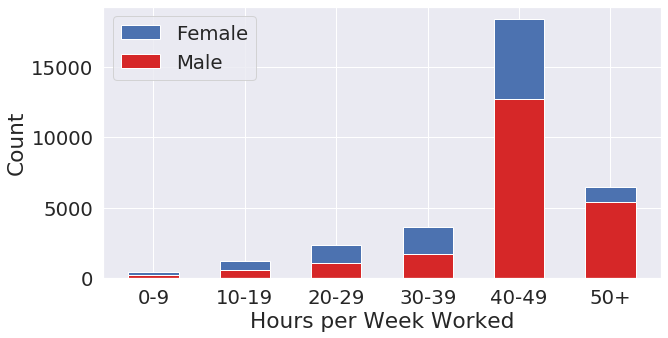

In [92]:
import matplotlib.pyplot as plt
import seaborn as sns

# In this bar chart we can eyeball the dependence between these two variables
# If these two variables were independent, we would expect the proportions of 
# red and blue to be consistent throughout the bars. This is not what we see.
fig = plt.figure(figsize=(10, 5))
sns.set(font_scale=1.8)
categories = ["0-9","10-19","20-29","30-39","40-49","50+"]
p1 = plt.bar(categories, malecount, width=0.55, color='#d62728')
p2 = plt.bar(categories, femalecount, width=0.55, bottom=malecount)
plt.legend((p2[0], p1[0]), ('Female', 'Male'))
plt.xlabel('Hours per Week Worked')
plt.ylabel('Count')
plt.show()

## Expected Value Calculation
\begin{align}
expected_{i,j} =\frac{(row_{i} \text{total})(column_{j} \text{total}) }{(\text{total observations})}  
\end{align}

In [93]:
# Calculate row and column totals to use in the expected value calculations
row_sums = contingency_table.iloc[0:2, 6].values
col_sums = contingency_table.iloc[2, 0:6].values

print(row_sums)
print(col_sums)

[10771 21790]
[  458  1246  2392  3667 18336  6462]


In [94]:
# We can pull the sample size from the crosstab 
total = contingency_table.loc['All','All']
total

32561

In [95]:
# Or just grab it from the dataframe:
df.shape[0]

32561

In [96]:
# Now we have everything that we need to calculate our table of expected values

expected = []
for i in range(len(row_sums)):
  expected_row = []
  for column in col_sums:
    expected_val = column*row_sums[i]/total
    expected_row.append(expected_val)
  expected.append(expected_row)
  
expected = np.array(expected)

# The shape of our table should match our contingency table
print(expected.shape)  
# The expected table here should match the table reported by scipy, or else
# we have made a mistake.
print(expected)

(2, 6)
[[  151.50388502   412.16995793   791.26046497  1213.02346365
   6065.44811277  2137.59411566]
 [  306.49611498   833.83004207  1600.73953503  2453.97653635
  12270.55188723  4324.40588434]]


In [97]:
# our observed table comes from the contingency table (crosstab) 
# without the margins

observed = pd.crosstab(df['sex'], df['hours_per_week_categories']).values
print(observed.shape)
observed

# This table should have the same shape as the expected table.

(2, 6)


array([[  235,   671,  1287,  1914,  5636,  1028],
       [  223,   575,  1105,  1753, 12700,  5434]])

## Chi-Squared Statistic with Numpy

\begin{align}
\chi^2 = \sum \frac{(observed_{i}-expected_{i})^2}{(expected_{i})}
\end{align}

For the $observed$ values we will just use a version of our contingency table without the margins as a numpy array. In this way, if our observed values array and our expected values array are the same shape, then we can subtract them and divide them directly which makes the calculations a lot cleaner. No for loops!

In [99]:
# numpy array broadcasting allows us to write code that looks a lot like the 
# equation above.

# Array broadcasting will work with numpy arrays but not python lists
chi_squared = ((observed - expected)**2/(expected)).sum() 
print(f"Chi-Squared: {chi_squared}")
# Our chi^2 statistic should match what was caculated by scipy -it does. 

Chi-Squared: 2287.190943926107


In [100]:
# Degrees of Freedom of a Chi-squared test
#degrees_of_freedom = (num_rows - 1)(num_columns - 1)
# Calculate Degrees of Freedom
dof = (len(row_sums)-1)*(len(col_sums)-1)
print(f"Degrees of Freedom: {dof}")

Degrees of Freedom: 5


We can use tables or a function to translate our chi^2 statistic to a p-value. Because this chi^2 statistic is giant, we kind of already know that the p-value will be very close to zero.


For a contingency table with 5 degrees of freedom any p-value greater than 11.07 will be significant and we will reject the null hypothesis of independence.

[Chi^2 Table](https://www.google.com/search?q=chi%5E2+table&rlz=1C5CHFA_enUS829US829&sxsrf=ACYBGNTNNVHlurLvNnKaf-q7YeMNgk5WEg:1572987940240&source=lnms&tbm=isch&sa=X&ved=0ahUKEwiBx6fb_NPlAhVQvJ4KHY8sDksQ_AUIEigB&biw=1333&bih=758#imgrc=XUssqKatril4ZM:)



In [101]:
from scipy.stats.distributions import chi2

print("P-value from chi^2 statistic:", chi2.sf(chi_squared, 5))

P-value from chi^2 statistic: 0.0
